In [1]:
%run visualize+imports.ipynb

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


1. age: age in years 
2. sex: sex (1 = male; 0 = female) 
3. cp: chest pain type <br>
     a. Value 1: typical angina <br>
    b. Value 2: atypical angina <br>
    c. Value 3: non-anginal pain <br>
    d. Value 4: asymptomatic  <br> 
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
5. chol: serum cholestoral in mg/dl 
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. restecg: resting electrocardiographic results <br>
    a. Value 0: normal <br>
    b. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
    c. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
8. thalach: maximum heart rate achieved  
9. exang: exercise induced angina (1 = yes; 0 = no) 
10. oldpeak = ST depression induced by exercise relative to rest 
11. slope: the slope of the peak exercise ST segment  <br>
    -- Value 1: upsloping <br>
    -- Value 2: flat <br>
    -- Value 3: downsloping <br>  
12. ca: number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. target: 1 disease. 0 no disease




In [3]:
path = ''

In [4]:
dataset = load_dataset('heart.csv')

In [5]:
dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
print (*dataset.columns)
print (*dataset.isna().any()) 

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal target
False False False False False False False False False False False False False False


age 0 sex 96 cp 143 trestbps 0 chol 0 fbs 258 restecg 147 thalach 0 exang 204 oldpeak 99 slope 21 ca 175 thal 2 target 138 

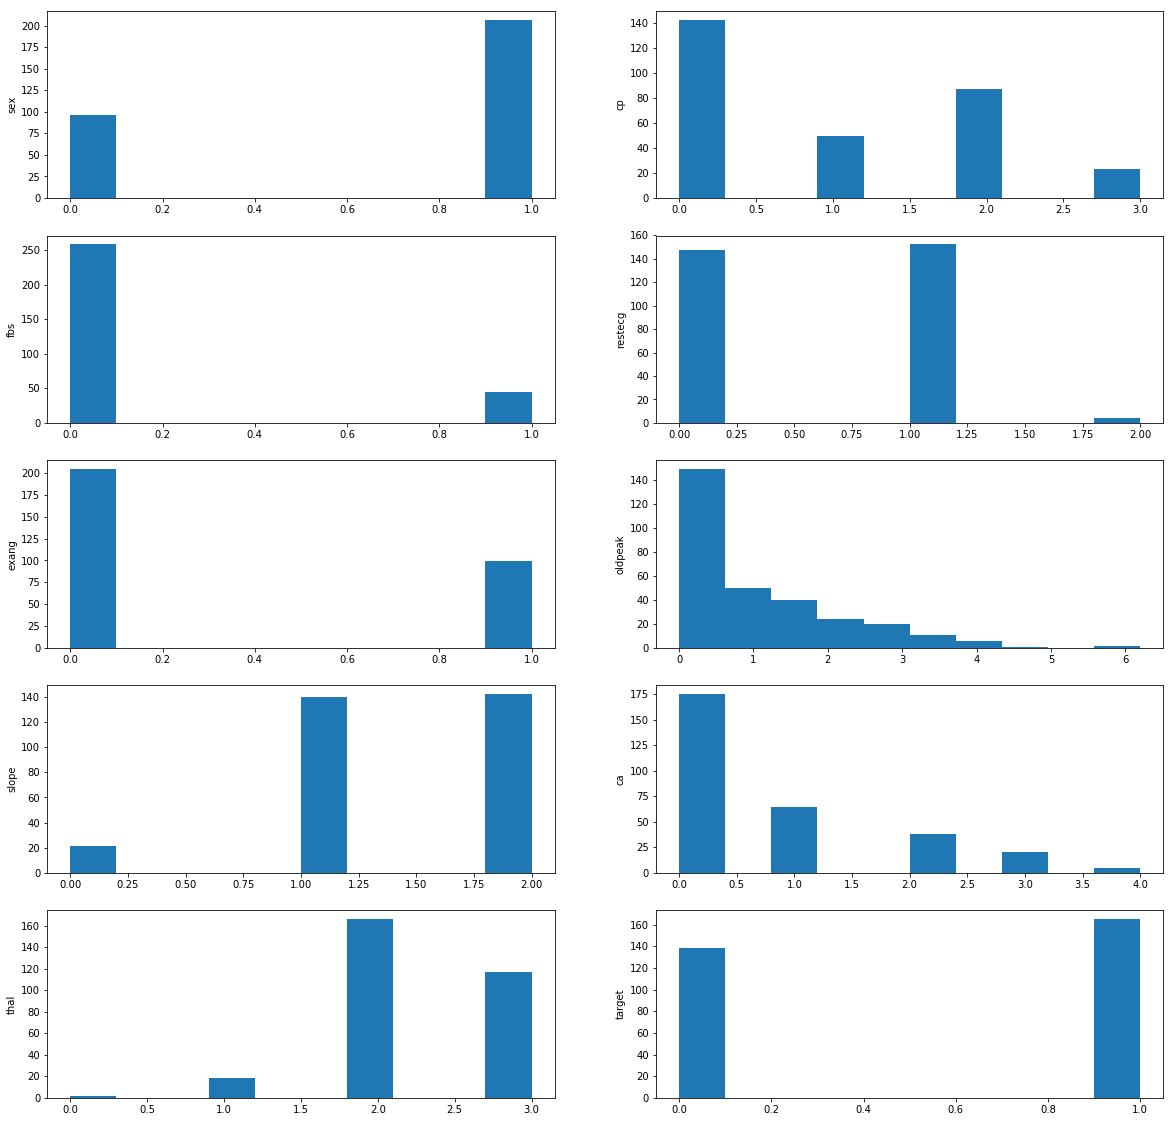

In [8]:
fig, ax = plt.subplots(5,2,figsize = (20,20))
ax = ax.ravel()
i = 0 
for column in dataset.columns: 
        print (column, sum(dataset[column] == 0), end = ' ')
        if sum(dataset[column] == 0) > 0: 
            ax[i].hist(dataset[column])
            ax[i].set_ylabel(column)
            
            i+=1
            

In [9]:
list_to_impute = ['trestbps', 'chol','slope',  'thal']
# according to the documentation 
# trestbps is the resting blood pressure so it should not be 0. 
# cholestrol also should not be 0 
#  slope 1,2,3 are valid values because 2 is flat. 0 slope doesn't mean anything. 
# thal should not be 0 because it has values 1,2,3 as valid values in 3 classes. 

In [10]:
imputer = SimpleImputer(missing_values = 0, strategy = 'mean',verbose = 2)

In [11]:
imputer = imputer.fit(dataset[list_to_impute])
dataset[list_to_impute] = imputer.transform(dataset[list_to_impute])

In [12]:
print (*dataset.isna().any())

False False False False False False False False False False False False False False


In [13]:
#dataset.corr()

In [14]:
#correl_draw(dataset)

In [15]:
dataset2 = pd.read_csv('heart.csv')

In [16]:
(dataset2[list_to_impute] == 0).any()

trestbps    False
chol        False
slope        True
thal         True
dtype: bool

replace zero values in list to impute to NaNs

In [17]:
dataset2[dataset2[list_to_impute] == 0] = np.nan

In [18]:
dataset2[list_to_impute].isna().any()

trestbps    False
chol        False
slope        True
thal         True
dtype: bool

In [19]:

imp = IterativeImputer(max_iter=10, random_state=0)
X = dataset2.drop(['target'],axis = 1)
imp.fit(X)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=0,
                 sample_posterior=False, tol=0.001, verbose=0)

In [20]:
data=imp.transform(X)


new_df = pd.DataFrame(data, columns = X.columns)

new_df['target'] = dataset2['target']

In [21]:
#new_df['age'] == dataset2['age'] just a test for the indexes not being mixed up anywhere

In [22]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,1.319853,0.0,1.0,1
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,1.424050,0.0,2.0,1
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.000000,0.0,2.0,1
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.000000,0.0,2.0,1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.000000,0.0,2.0,1


In [23]:
new_df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

fit_transform only the training data and transform for the test set!

In [24]:
# Create features and labels
def plot_feature_list_svm(dataset, testsize): 
    features = dataset.drop(['target'], axis=1) 

    labels = dataset['target']

    features2 = dataset.drop(['target','thalach'],axis = 1) #thalach seems to be correlated to slope!

    features3 = dataset.drop(['target', 'slope'], axis =1) # try by removing slope

    features4 = dataset.drop(['target', 'oldpeak'],axis = 1) # try by removing oldpeak

    list_features = [features,features2,features3,features4]
    #plot_metrics(list_features,labels, testsize, [0.5,1.0])
    confusion_svm(list_features, labels, 0.20)
    
    return list_features,labels
    #visualize_svm(list_features,labels,testsize, [0.5,1.0]) 
    

In [25]:
def plot_feature_list_knn(list_features,labels):
    confusion_knn(list_features, labels, 0.20)

Confusion matrix, with normalization


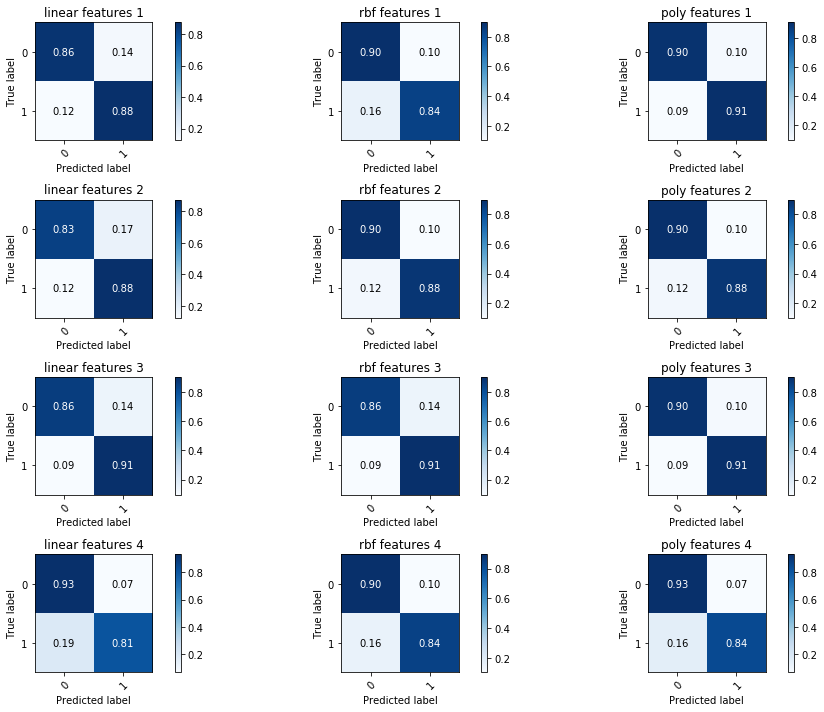

In [26]:
#without imputation
dataset1 = pd.read_csv('heart.csv')
list_features_org, labels_org  = plot_feature_list_svm(dataset1,0.2)

In [27]:
print ('with the normal imputer')

with the normal imputer


Confusion matrix, with normalization


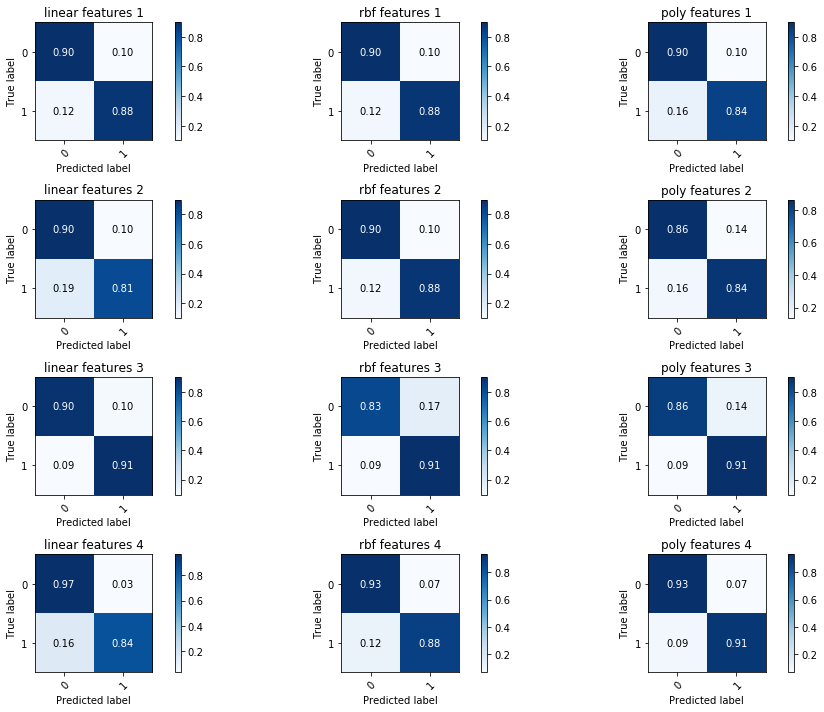

In [28]:
list_features, labels = plot_feature_list_svm(dataset, 0.20)

Confusion matrix, with normalization


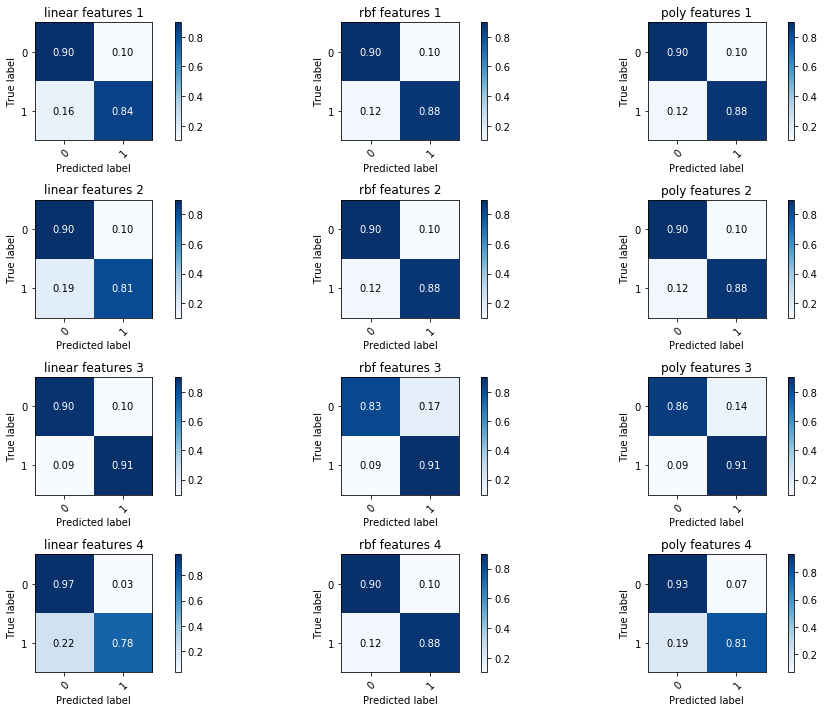

In [29]:
list_features_new, labels_new = plot_feature_list_svm(new_df, 0.20)

Confusion matrix, with normalization


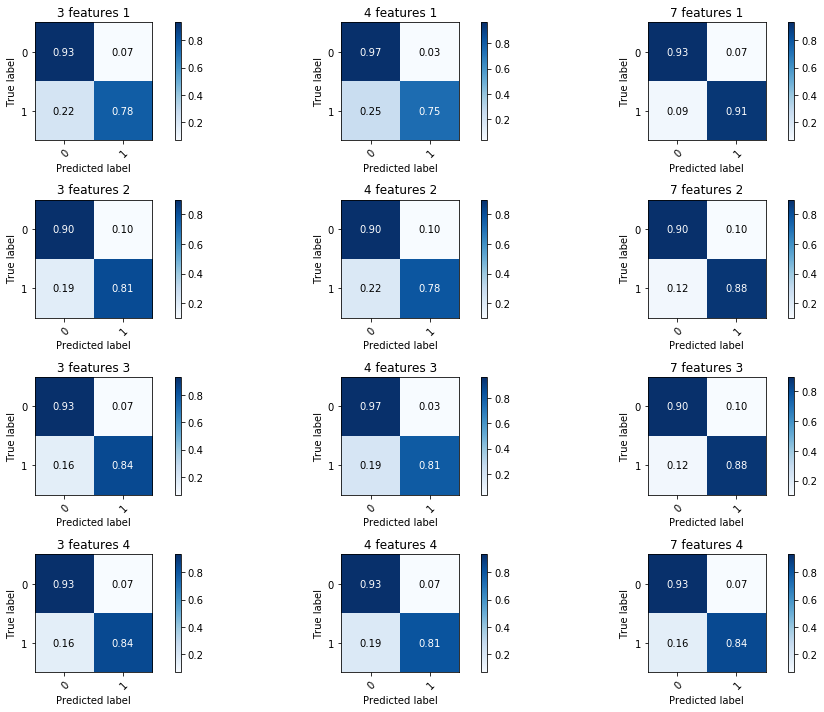

In [30]:
#without any imputation
plot_feature_list_knn(list_features_org,labels_org)

Confusion matrix, with normalization


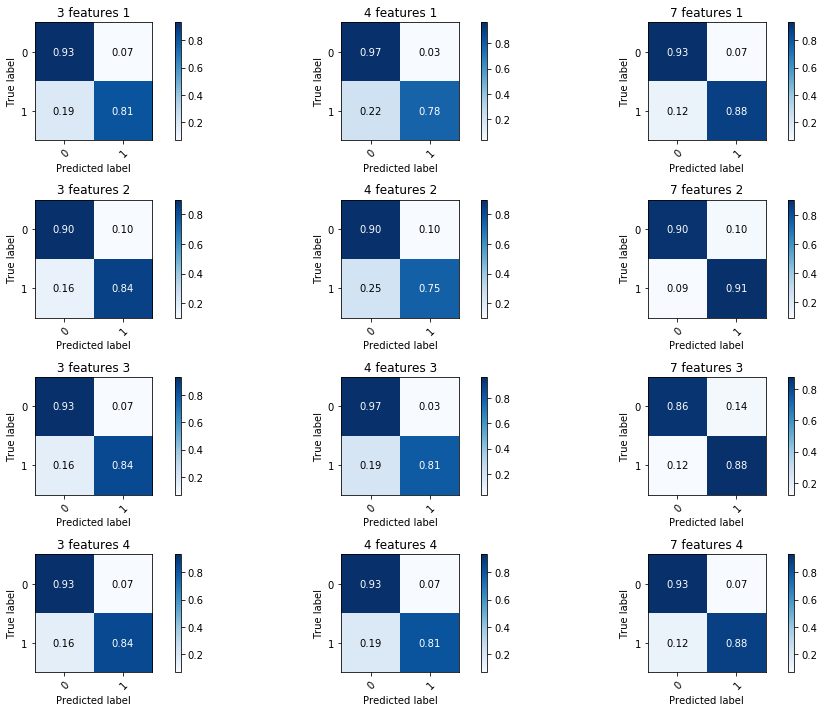

In [31]:
# simple imputation
plot_feature_list_knn(list_features,labels)

Confusion matrix, with normalization


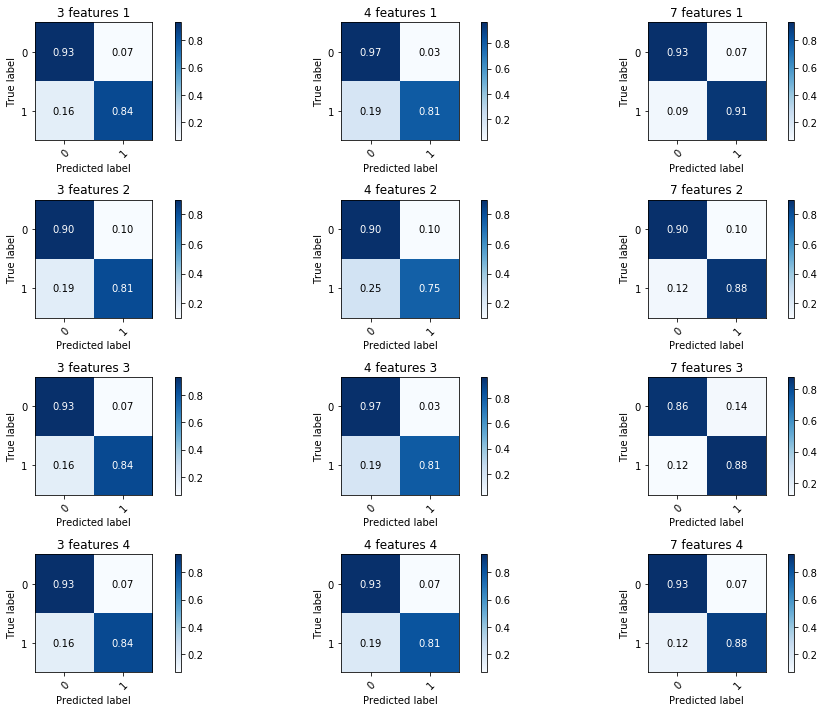

In [32]:
# Iterative Imputer
plot_feature_list_knn(list_features_new,labels_new)

With the iterative imputer the False Positive and False Negative rate has declined when we see the confusion matrix visually for all the 4 feature sets. 